<h1><p style="display: block; text-align: center;">Unsupervised Learning Models</p></h1>

<h3><p style="display: block; text-align: center;">K-Means, Hierarchical Clustering</p></h3>

<h1><p style="display: block; text-align: center;">This presentation is running inside of a Jupyter Notebook</p></h1>



This presentation is running inside of a Jupyter Notebook.


<h1><p style="display: block; text-align: center;">Github Link</p></h1>
<center>   

#### A copy of this presentation and the hands-on codes can be found in a github repository in this link:
#### https://github.com/damilolah/Clustering_Methods
</center>


In [1]:
import platform
print('Using Python version', platform.python_version())

Using Python version 3.6.8



<h1><p style="display: block; text-align: center;">Let's Code</p></h1>

    
#### We'll be creating machine learning models using clustering algorithms to categorize species of flowers contained in the Iris dataset based on their petal height and petal width. 



In [2]:
#Import the libraries needed


import pandas as pd
from scipy.spatial import distance_matrix
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial import distance_matrix
#from sklearn.cluster import AgglomerativeClustering






#### Let's read our data into memory - The famous IRIS dataset


In [3]:

iris = datasets.load_iris()


 

#### Explore data


In [4]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

#### Preprocess Data

In [18]:
my_data = pd.DataFrame(iris.data)
my_data.columns = iris.feature_names
my_data["target"] = iris.target
my_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
my_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


#### Exploratory Data Analysis



Text(0,0.5,'Petal Width')

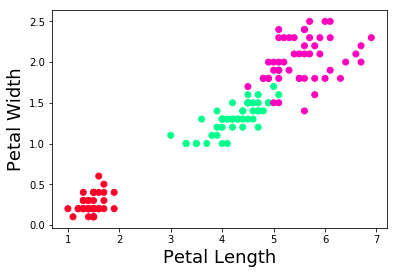

In [7]:

plt.scatter(my_data.iloc[:,2], my_data.iloc[:,3], c=my_data.target, cmap='gist_rainbow')
plt.xlabel('Petal Length', fontsize=18)
plt.ylabel('Petal Width', fontsize=18)

#### From the above we can immediately see 3 different species of flowers


#### Data Question: How can we use data to precisely predict the specie of a flower based on the petal length and petal width
#### Let's extract the features we are interested in as well as the label/target

In [8]:
X = my_data.iloc[:,2:4]
y = my_data.target


#### From the plot, we can observe that k = 3 but lets confirm this using the elbow method 

Text(0,0.5,'Petal Width')

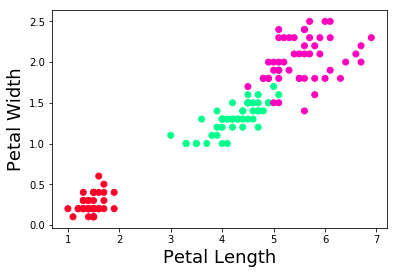

In [19]:
plt.scatter(my_data.iloc[:,2], my_data.iloc[:,3], c=my_data.target, cmap='gist_rainbow')
plt.xlabel('Petal Length', fontsize=18)
plt.ylabel('Petal Width', fontsize=18)

#### Determine K (optimal no. of species in our dataset) using the Elbow Method on a subset of the data


#### Partition data

In [20]:

X_1, X_2, y_1, y_2 = train_test_split(X, y, test_size=0.5)

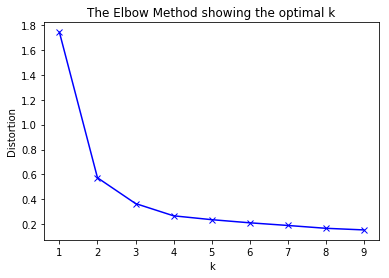

In [21]:

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_1)
    kmeanModel.fit(X_1)
    distortions.append(sum(np.min(cdist(X_1, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_1.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### Method 1: KMeans Clustering

#### K-means clustering is one of the simplest and popular unsupervised machine learning algorithms. You’ll define a target number k, which refers to the number of centroids you need in the dataset. A centroid is the imaginary or real location representing the center of the cluster.
#### Every data point is allocated to each of the clusters through reducing the in-cluster sum of squares.
#### In other words, the K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible.

In [11]:
k = 3
kmeanModel = KMeans(n_clusters=k).fit(X)
kmeanModel.fit(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

#### Evaluation K Means using Average SSE


In [12]:
error = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0]
error

0.3692571031973975

#### Clusters formed by K Means


Text(0.5,1,'K Means Clustering')

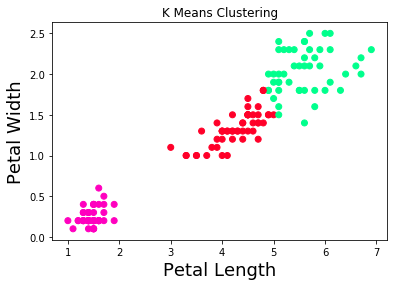

In [13]:
plt.scatter(X['petal length (cm)'], X['petal width (cm)'], c=kmeanModel.labels_, cmap='gist_rainbow')
plt.xlabel('Petal Length', fontsize=18)
plt.ylabel('Petal Width', fontsize=18)
plt.title("K Means Clustering")

### Method 2: Hierarchical Clustering 

### Hierarchical clustering, also known as hierarchical cluster analysis,
### is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, 
### where each cluster is distinct from each other cluster,
### and the objects within each cluster are broadly similar to each other.

In [14]:
final_df = pd.DataFrame(distance_matrix(X, X, p=2), index=X.index, columns=X.index)


#### Generate the linkage matrix - Complete

In [27]:

Z = linkage(final_df , 'complete')

# max_d as in max_distance
max_d = 30


/Users/ruthokoilu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


#### Dendrogram

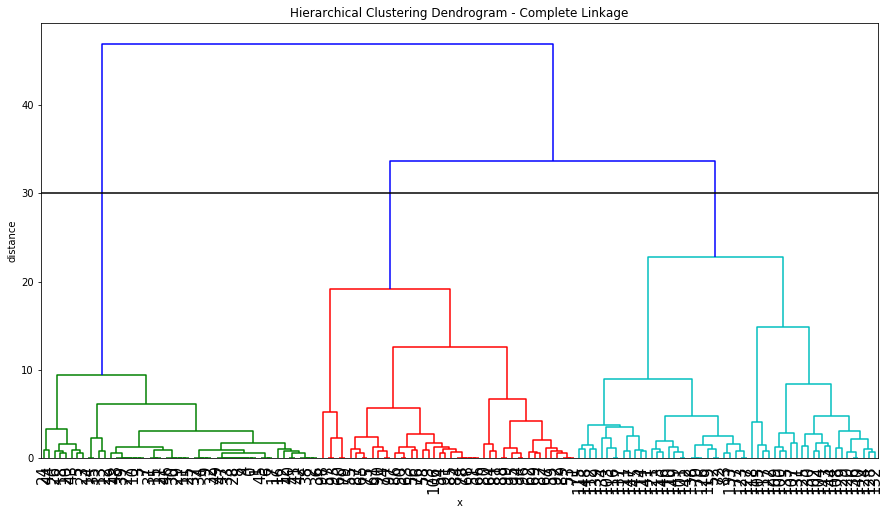

In [28]:
plt.figure(figsize=(15, 8))
plt.title('Hierarchical Clustering Dendrogram - Complete Linkage')
plt.xlabel('x')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='none',  # show only the last p merged clusters
    p=150,                  # Try changing values of p
    leaf_rotation=90.,      # rotates the x axis labels
    leaf_font_size=15.      # font size for the x axis labels 
)
plt.axhline(y=max_d, c='k')
plt.show()

#### Clusters formed by Hierarchical Clustering Method


Text(0.5,1,'Hierarchical Clustering')

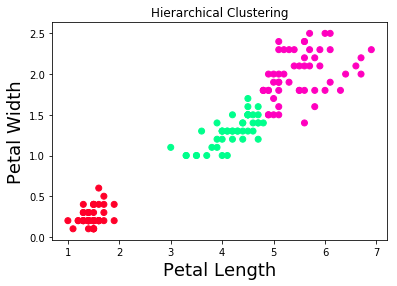

In [16]:
hclusters = fcluster(Z, t=3, criterion='maxclust')
plt.scatter(X['petal length (cm)'], X['petal width (cm)'], c=hclusters, cmap='gist_rainbow')
plt.xlabel('Petal Length', fontsize=18)
plt.ylabel('Petal Width', fontsize=18)
plt.title("Hierarchical Clustering")

#### Evaluation Hierachical Clustering using Average SSE

In [17]:

#SSE
def SSE_generic(c_):
    def each_cluster(c):
        cMean = c.mean()
        #print("cMean is ",cMean)
        c_mean = pd.DataFrame([[cMean[0],cMean[1]]], columns=['xcord', 'ycord']) 
        #print("cluster mean, a.k.a centroid:", c_mean)
        sum_c = 0
        for i in range(len(c)):
            sum_c += (distance_matrix(c.iloc[i:i+1,], c_mean, p=2)**2)
        return(sum_c)
    total_sse=0
    for j in range(len(c_)): 
        sum_c = each_cluster(c_[j])
        total_sse = total_sse + sum_c       
    return(total_sse)

sse = SSE_generic([X[hclusters==1], X[hclusters==2],X[hclusters==3]])

error = sse/X.shape[0]
error[0][0]

0.21307457219538384

<h1>Thanks for listening!</h1>